# Task 1 : Data Cleaning and Preprocessing

---

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read dataser
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
# overview of the dataset
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.65,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.50,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.00,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.75,NaN,S
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.05,NaN,S


In [5]:
# drop the unnecessary columns
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [6]:
# checking for the size of the dataset
print(f'No. of rows : {df.shape[0]}')
print(f'No. of columns : {df.shape[1]}')

No. of rows : 891
No. of columns : 9


In [7]:
# checking for the datatypes of the dataset
print("Columns          Datatype")
print("-"*25)
print(df.dtypes)

Columns          Datatype
-------------------------
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [8]:
# checking for the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
# mathematical overview of the dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# checking for the correlation of the dataset
df_num = df.select_dtypes(['int','float'])
df_num.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
# checking for the null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
# checking for the null values percentage wise
df.isna().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In Cabin column ~77% values are missing and Cabin also not indicats the survivanc of the passanger that why drop that column 

In [13]:
df.drop('Cabin', axis=1, inplace=True)

In [14]:
# overview of the dataset
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


## Univariante & Bivariant Analysis

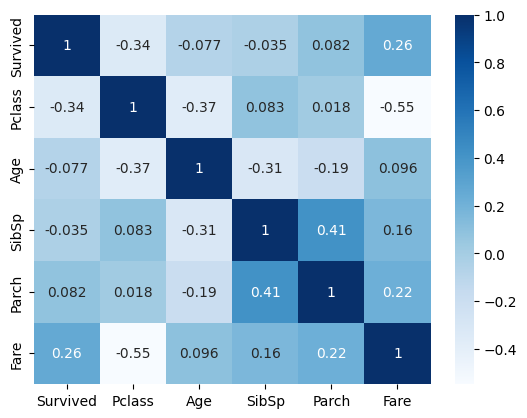

In [15]:
# visualizling the correlation using heatmap
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)
plt.show()

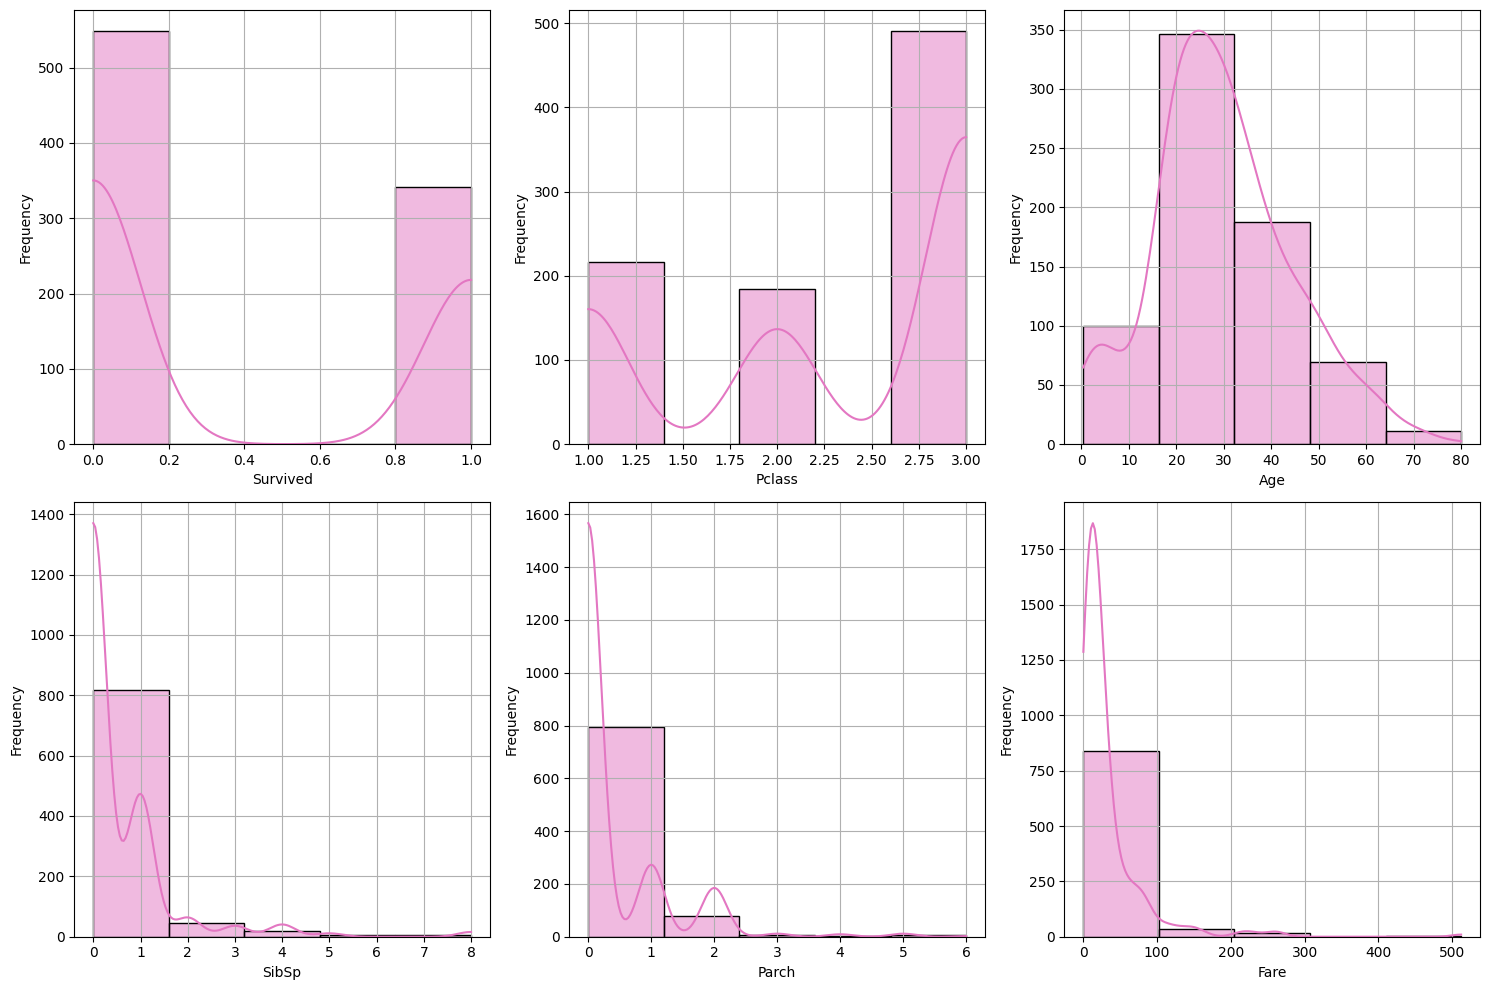

In [16]:
# checking for the distribution of numerical columns
plt.figure(figsize=(15,10))
a = 1
for col in df_num:
    plt.subplot(2,3,a)
    sns.histplot(df[col], kde=True, bins=5, color='C6')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    a +=1 
plt.show()

In [17]:
# function of visualizing outliers
def outlier_check(data,columns):
    i = 1
    plt.figure(figsize=(20,15))
    for colom in columns:
        plt.subplot(3,3,i)
        sns.boxplot(x = data[colom], color='brown')
        plt.title(f'Box plot of {colom}')
        i += 1
    plt.show()

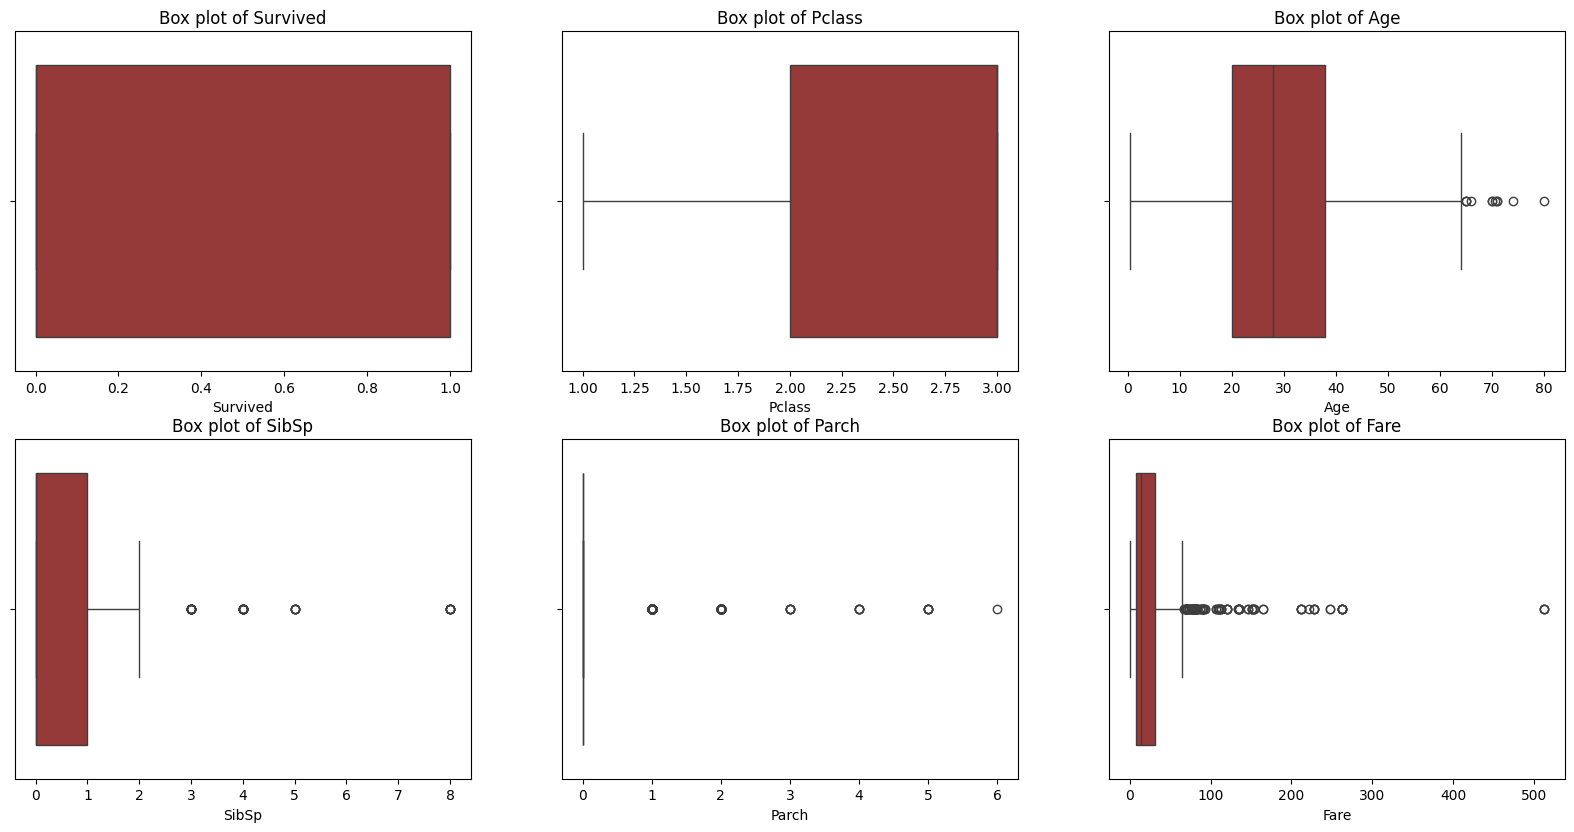

In [18]:
# checking for the outliers with function call
outlier_check(df,df_num)

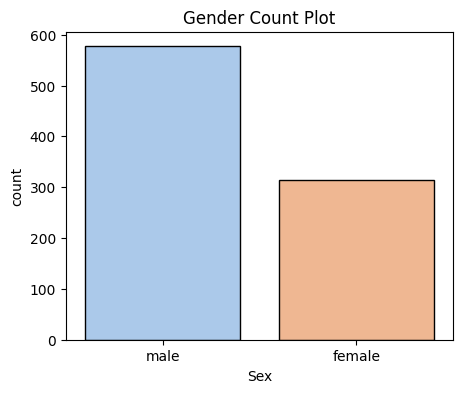

In [19]:
# visualize Gender column 
plt.figure(figsize=(5,4))
sns.countplot(x=df['Sex'], palette='pastel', edgecolor='Black')
plt.title("Gender Count Plot")
plt.show()

More than 500 people were male

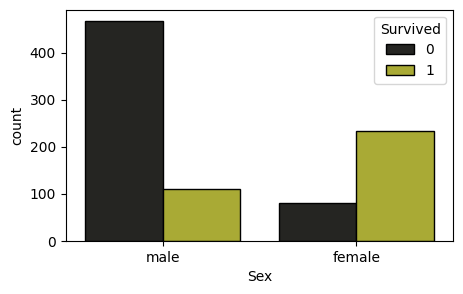

In [20]:
# visualize the Gender column with their Survived
plt.figure(figsize=(5,3))
sns.countplot(x=df['Sex'], hue=df['Survived'], color='C8', edgecolor='black')
plt.show()

Mostly female survived over male, More than 400 males died

## Data Preprocessing

### Missing values imputation

In [21]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Only 2 column is having null values

In [22]:
# filling Age missing value with KnnImputer
from sklearn.impute import KNNImputer

In [23]:
imputer = KNNImputer(n_neighbors=2)
df['Age'] = imputer.fit_transform(df[['Age']])

In [24]:
# filling Embarked missing value with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now, the missing value has been treated

### Outlier treatment

In [26]:
# function for treatment of outliers 
threshold = 1.5
def treat_outliers(df, numerical_colls):
    for colos in numerical_colls.columns:
    
        # finding q1, q3 and IQR
        q1 = df[colos].quantile(0.25)
        q3 = df[colos].quantile(0.75)
        IQR = q3 - q1
    
        # finding upper wisker and lower wisker
        upper_wisker = q3 + threshold * IQR
        lower_wisker = q1 - threshold * IQR
    
        # capping the outliers
        df[colos] = df[colos].clip(lower=lower_wisker, upper=upper_wisker)

In [27]:
# calling treat_outlier function for treatment
treat_outliers(df, df_num)

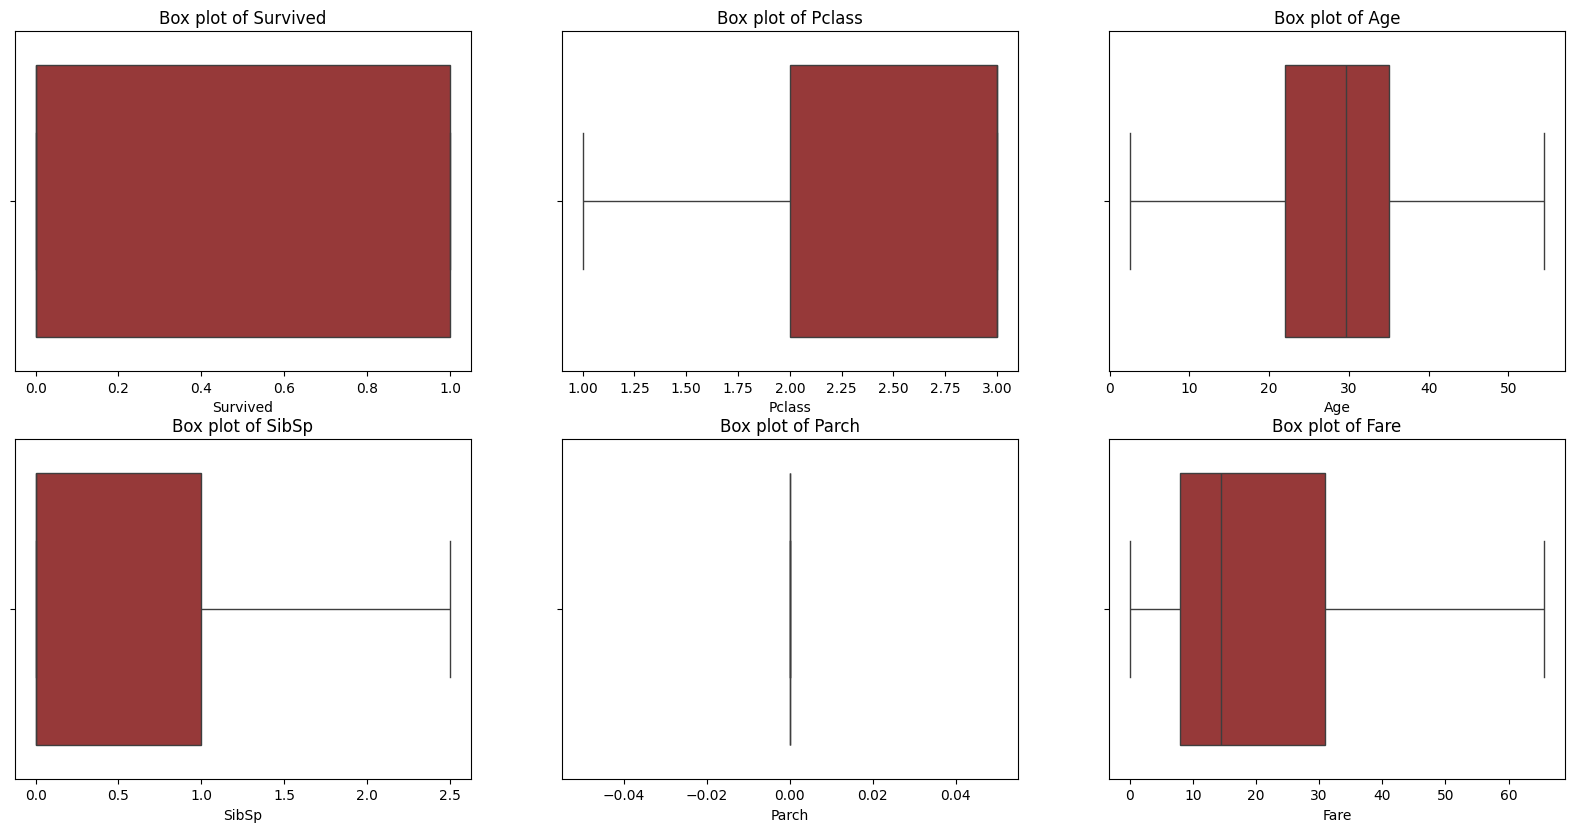

In [28]:
# checking for outliers after treatment
outlier_check(df,df_num)

Outlier treatment has been completed

### Encoding categorical columns

In [29]:
# mapping the Sex column
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [30]:
# using label encoder for Embarked column
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()

In [32]:
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [33]:
# checking for the coder of the label
encoder.classes_

array(['C', 'Q', 'S'], dtype=object)

Now, the categorical column has beed done

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1.0,0,7.2500,2
1,1,1,1,38.0,1.0,0,65.6344,0
2,1,3,1,26.0,0.0,0,7.9250,2
3,1,1,1,35.0,1.0,0,53.1000,2
4,0,3,0,35.0,0.0,0,8.0500,2


### Scaling the data


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [37]:
df[:5]

array([[-0.78927234,  0.82737724, -0.73769513, -0.61191663,  0.81022003,
         0.        , -0.82055245,  0.58595414],
       [ 1.2669898 , -1.56610693,  1.35557354,  0.71530435,  0.81022003,
         0.        ,  2.03162322, -1.9423032 ],
       [ 1.2669898 ,  0.82737724,  1.35557354, -0.28011139, -0.60251196,
         0.        , -0.78757757,  0.58595414],
       [ 1.2669898 , -1.56610693,  1.35557354,  0.46645042,  0.81022003,
         0.        ,  1.4192968 ,  0.58595414],
       [-0.78927234,  0.82737724, -0.73769513,  0.46645042, -0.60251196,
         0.        , -0.78147111,  0.58595414]])

Scaling had been compleated

## Task one compleated